In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

In [8]:
rfr_feat_imp = pd.read_csv(r'..\data\processed\RandomForestRegressor_feature_importances.csv', index_col=0)
rfr_feat_imp

,0
i,
l_0,0.000078
l_1,0.000109
l_2,0.000543
l_3,0.000224
l_4,0.000072
...,...
m_169,0.000566
m_213,0.000241
m_24,0.000138


## For PCA loadings, the 1st principal component separates Random vs Fasted
## 2nd PC roughly separates their OGTT glucose tolerance 

In [11]:
pca_loadings = pd.read_csv(r'..\data\processed\PCA_loadings.csv', index_col=0)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
i,,,,,,,,,,,,,,,,,,,,,
l_0,0.310531,0.086246,0.295792,0.114823,-0.409675,-0.077238,0.284320,-0.372093,-0.138271,-0.123392,...,-0.028091,-0.016773,0.095484,0.018561,-0.172061,-0.040868,0.011424,0.032280,-0.007644,5.259281e-15
l_1,-0.068347,0.126659,0.277326,0.059334,-0.431271,-0.008035,0.181902,-0.344885,-0.274535,-0.085639,...,-0.070965,-0.041339,0.126471,-0.018663,-0.080373,-0.008260,-0.043507,-0.046827,0.083249,-2.289419e-15
l_2,0.265810,-0.284365,0.150411,0.146854,-0.637921,0.195378,-0.066032,-0.230329,-0.112728,-0.164111,...,-0.019800,-0.002817,0.032507,0.031058,-0.006726,0.021502,0.020857,0.025851,0.036717,4.669526e-16
l_3,0.301548,0.063341,0.194355,0.252840,-0.149542,0.078641,0.031024,-0.372421,-0.225886,-0.138251,...,0.075058,-0.002286,0.090253,-0.032193,-0.014315,-0.039038,-0.058916,0.046468,0.070295,2.723001e-15
l_4,0.211633,-0.137616,0.109383,-0.000907,-0.411857,0.092067,-0.032433,-0.407962,-0.198806,-0.205043,...,-0.012552,-0.022498,-0.124920,0.077668,-0.026260,0.018699,-0.033354,0.094149,0.082060,-1.067859e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_169,0.219981,0.377147,-0.121822,0.309995,-0.010129,-0.342535,-0.100410,0.224624,0.080051,0.123157,...,-0.021599,-0.054550,-0.023419,-0.096314,0.052166,0.044880,0.042515,-0.001762,0.053702,3.512209e-17
m_213,0.560037,0.044828,-0.611592,0.063132,-0.203307,0.188391,-0.129049,0.029330,0.060609,0.182713,...,0.029508,-0.039030,-0.043413,0.054882,0.018862,0.019112,-0.038360,0.012635,0.059994,-1.781712e-17
m_24,0.558559,-0.008556,-0.683029,0.132528,-0.191291,0.188804,-0.080217,-0.019923,0.011109,0.133419,...,0.010233,-0.009655,-0.037403,0.029416,0.015177,0.027741,-0.002787,0.016537,0.052947,-5.169993e-17


In [ ]:
loadings_rank = 

In [56]:
large_loadings = pca_loadings.loc[(pca_loadings['1'] > 0.4) | (pca_loadings['1'] < -0.6), '1']
large_loadings_index = large_loadings.index

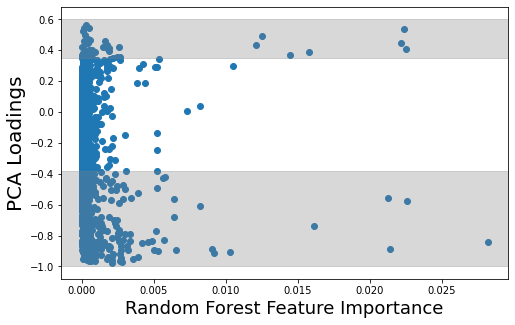

In [67]:
# plt.hlines(0.35, 0, 0.031, color='orange')
# plt.hlines(-0.38, 0, 0.031, color='orange')
plt.scatter(rfr_feat_imp, pca_loadings['1'])
plt.ylabel('PCA Loadings', fontsize=20)
plt.xlabel('Random Forest Feature Importance', fontsize=18)
plt.gcf().set_size_inches(8, 5)
plt.axhspan(0.35, 0.6, color='gray', alpha=0.3)
plt.axhspan(-0.38, -1, color='gray', alpha=0.3)

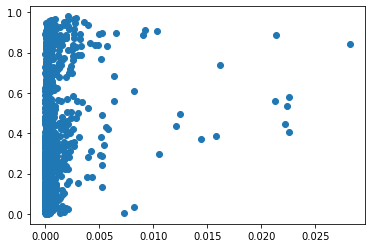

In [58]:
plt.scatter(rfr_feat_imp, abs(pca_loadings['1']))

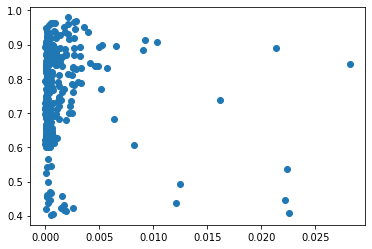

In [57]:
plt.scatter(rfr_feat_imp.loc[large_loadings_index], abs(pca_loadings['1'].loc[large_loadings_index]))

In [54]:
kendalltau(abs(pca_loadings['1']), rfr_feat_imp)

KendalltauResult(correlation=0.18723155286113743, pvalue=2.0547021105622996e-31)